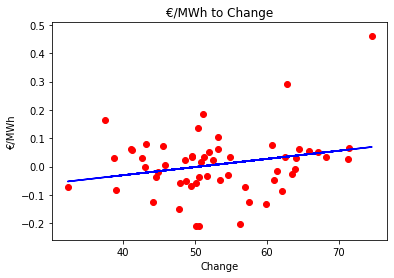

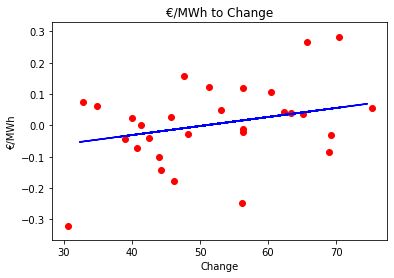

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Importing the dataset
dataset = pd.read_csv('C:/Users/kosta/Documents/Industry_4.0/PredictionModelPrototype/MarketPriceData.csv')


# Transform all categorical values to integers
for key,value in dataset.iteritems():
        #for key in dataset.columns:
            if dataset[key].dtype == type(object):
                le = LabelEncoder()
                dataset[key] = le.fit_transform(dataset[key].astype(str))
                
                
X = dataset['SMP (€/MWh)'].values.reshape(-1,1)
y = dataset['Monthly Change'].values.reshape(-1,1)
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('€/MWh to Change')
plt.xlabel('Change')
plt.ylabel('€/MWh')
plt.show()

# Visualising the Test set results
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('€/MWh to Change')
plt.xlabel('Change')
plt.ylabel('€/MWh')
plt.show()